In [1]:
import gym
import os
from stable_baselines.results_plotter import load_results
from seagul.plot import smooth_bounded_curve
import matplotlib.pyplot as plt
import numpy as np
import torch
import pybullet_envs
from stable_baselines import PPO2 as ALGO

env_name = "Walker2DBulletEnv-v0"

def do_rollout_stable(init_point=None):
    env = gym.make(env_name)
    model.observation_space = env.observation_space
    #td3_model = TD3.load(script_path + "../rl-baselines-zoo/baseline_log2/td3/su_acrobot_cdc-v0_2/su_acrobot_cdc-v0.zip")

    if init_point is not None:
        obs = env.reset(init_point)
    else:
        obs = env.reset()

    obs = torch.as_tensor(obs, dtype=torch.float32)

    acts_list = []
    obs1_list = []
    rews_list = []

    dtype = torch.float32
    act_size = env.action_space.shape[0]
    obs_size = env.observation_space.shape[0]

    done = False
    cur_step = 0

#    import ipdb; ipdb.set_trace()

    while not done:
        acts = model.predict(obs)[0]


        obs, rew, done, out = env.step(acts)

        # env.render()
        obs1_list.append(obs)
        obs = torch.as_tensor(obs, dtype=dtype)

        acts_list.append(torch.as_tensor(acts))
        rews_list.append(torch.as_tensor(rew, dtype=dtype))
        cur_step += 1

    ep_obs1 = torch.tensor(obs1_list)
    ep_acts = torch.stack(acts_list)
    ep_rews = torch.stack(rews_list)

    return ep_obs1, ep_acts, ep_rews

/home/sgillen/anaconda3/envs/stable/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sgillen/anaconda3/envs/stable/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sgillen/anaconda3/envs/stable/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sgillen/anaconda3/envs/stable/lib/pyt

Loading a model without an environment, this model cannot be trained until it has a valid environment.


/home/sgillen/anaconda3/envs/stable/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


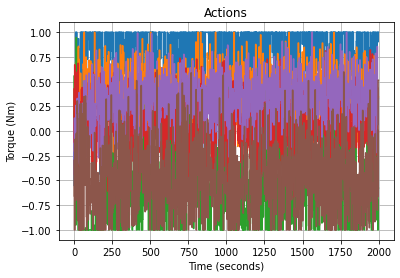

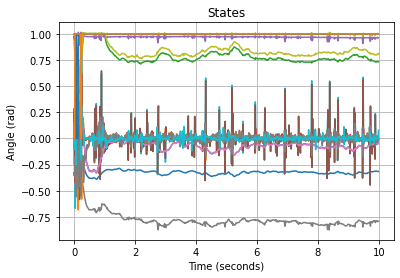

In [3]:

#model = ALGO.load("/home/sgillen/work/third_party/rl-baselines-zoo/trained_agents/td3/Walker2DBulletEnv-v0.pkl")
model = ALGO.load("/home/sgillen/work/lorenz/run_stable/walker0.zip")

obs_hist, act_hist, rew_hist = do_rollout_stable()

t = np.array([i*2 for i in range(act_hist.shape[0])])
plt.step(t, act_hist)
plt.title('Actions')
plt.xlabel('Time (seconds)')
plt.ylabel('Torque (Nm)')
plt.grid()
#plt.savefig(script_path + '../figs/act_hist.png')
plt.figure()

t = np.array([i*.01 for i in range(obs_hist.shape[0])])
plt.plot(t, obs_hist)

plt.title('States')
plt.xlabel('Time (seconds)')
plt.ylabel('Angle (rad)')
plt.grid()
plt.show()